### LOADING DATA ###

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
data = pd.read_excel (r'./UniversalBank.xls', sheet_name = 'RawData')
data = data.drop(["ID"],axis=1)
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


- **ID** - Customer ID
- Age - Customer's age in completed years
- Experience - #years of professional experience
- Income - Annual income of the customer - in thousands usd
- **ZIPCode** - Home Address ZIP code. 
- Family - Family size of the customer
- CCAvg - Avg. spending on credit cards per month - in thousands usd
- Education - Education Level. 1: Undergrad; 2: Graduate; 3: - Advanced/Professional
- Mortgage - Value of house mortgage if any - in thousands usd
######  
- Personal Loan - Did this customer accept the personal loan offered in the last campaign?
- Securities Account - Does the customer have a securities account with the bank?
- CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
- Online - Does the customer use internet banking facilities?
- CreditCard - Does the customer uses a credit card issued by UniversalBank?

### EXPLORATORY DATA ANALYSIS ###

In [3]:
data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
data_out = data[(data['Experience'] < 0)]
data_out.size
data_out.head(9)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [5]:
data.drop(data[(data['Experience'] < 0)].index, inplace = True)
data = data.reset_index()
data = data.iloc[:,1:]
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4944,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4945,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4946,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.0000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,93151.573363,2.391471,1.9359,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,2126.669017,1.148444,1.7477,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,9307.000000,1.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,91911.000000,1.000000,0.7000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,93437.000000,2.000000,1.5000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.6000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.0000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'ZIP Code'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>],
       [<AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>],
       [<AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

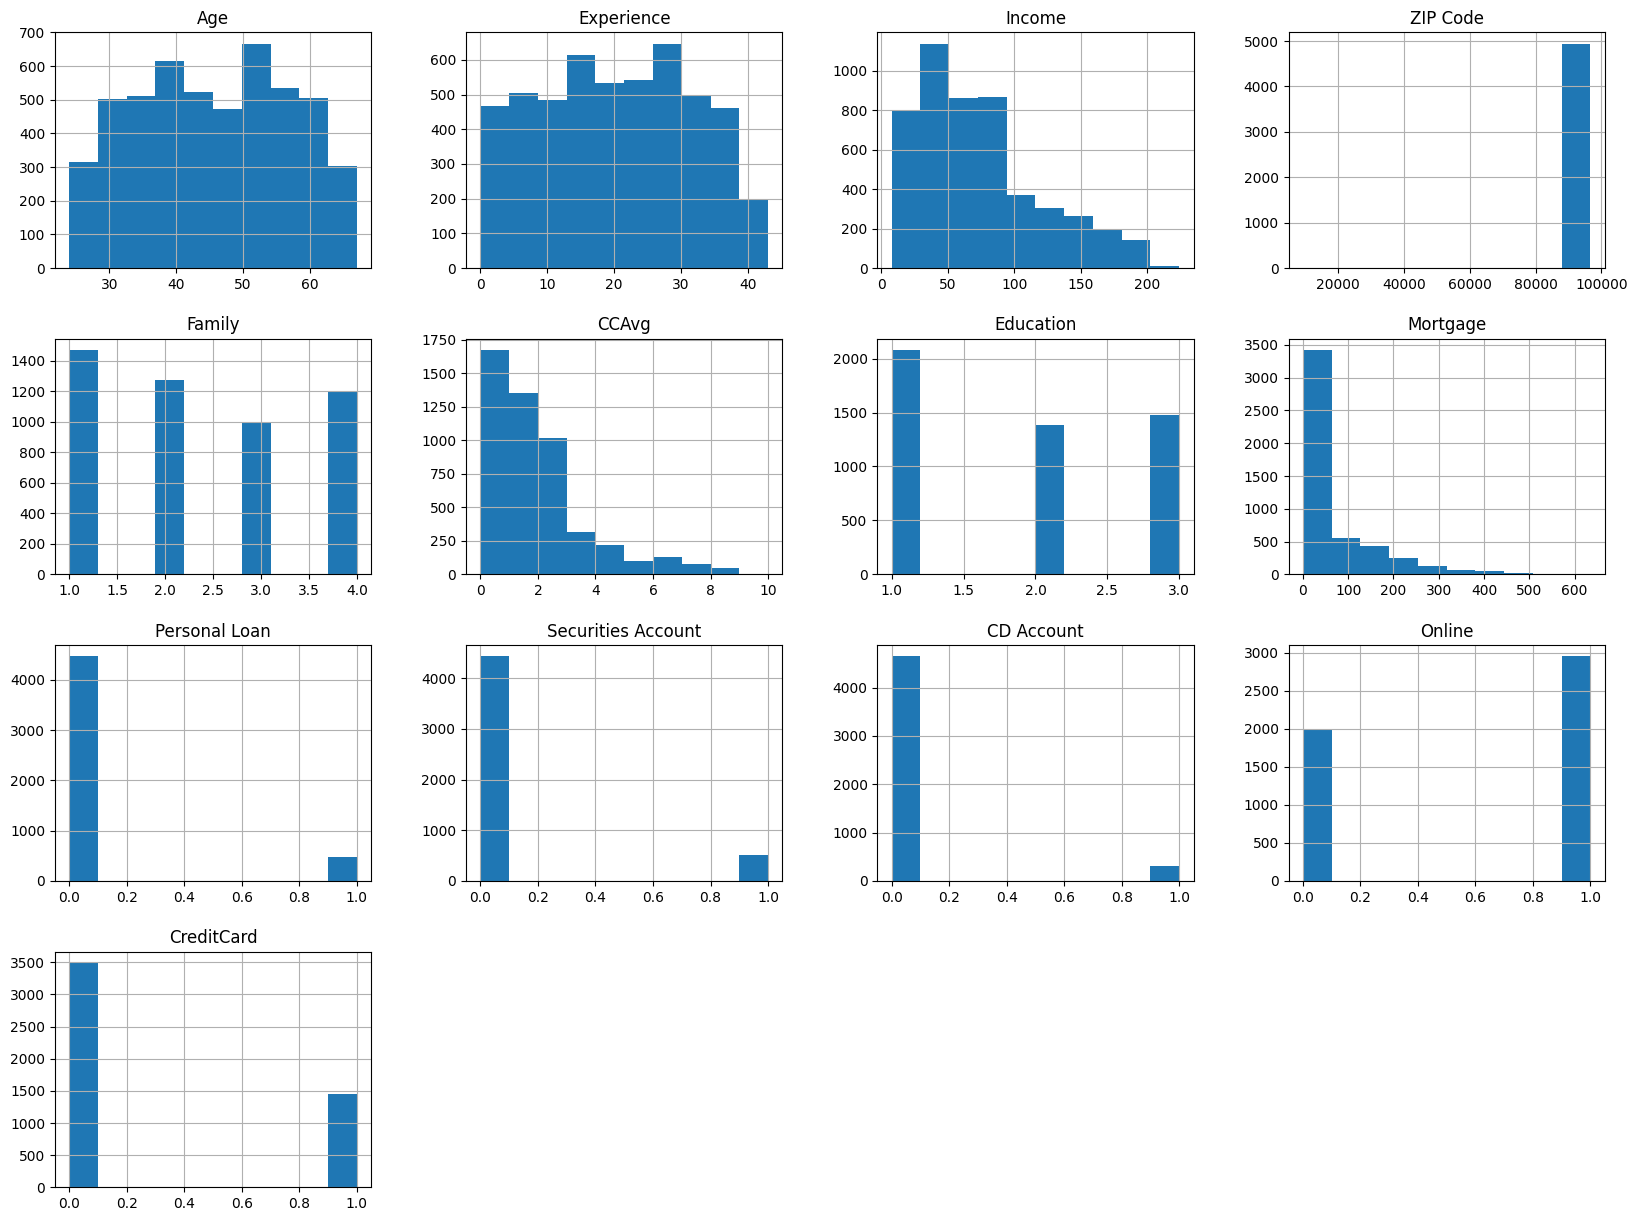

In [7]:
# Histogram
data.hist(figsize=(20,15))

### Clustering Analytics ###

In [8]:
#Library for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [9]:
#Data Selection for Clustering
df_clus = data.iloc[:,0:8]
df_clus = df_clus.drop(["ZIP Code"],axis=1)
df_clus

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
0,25,1,49,4,1.6,1,0
1,45,19,34,3,1.5,1,0
2,39,15,11,1,1.0,1,0
3,35,9,100,1,2.7,2,0
4,35,8,45,4,1.0,2,0
...,...,...,...,...,...,...,...
4943,29,3,40,1,1.9,3,0
4944,30,4,15,4,0.4,1,85
4945,63,39,24,2,0.3,3,0
4946,65,40,49,3,0.5,2,0


In [10]:
#Data Transformation (Standardized)
scaler = StandardScaler()
dt_scaled = scaler.fit_transform(df_clus)
df_scaled = pd.DataFrame(dt_scaled, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage'])
df_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
0,-1.816072,-1.709074,-0.538182,1.400757,-0.192215,-1.046782,-0.556228
1,-0.049224,-0.117679,-0.863506,0.529926,-0.249439,-1.046782,-0.556228
2,-0.579278,-0.471322,-1.362335,-1.211736,-0.535558,-1.046782,-0.556228
3,-0.932648,-1.001787,0.567918,-1.211736,0.437247,0.144176,-0.556228
4,-0.932648,-1.090198,-0.624935,1.400757,-0.535558,0.144176,-0.556228
...,...,...,...,...,...,...,...
4943,-1.462703,-1.532252,-0.733376,-1.211736,-0.020543,1.335134,-0.556228
4944,-1.374360,-1.443841,-1.275582,1.400757,-0.878901,-1.046782,0.278590
4945,1.540939,1.650538,-1.080388,-0.340905,-0.936125,1.335134,-0.556228
4946,1.717624,1.738949,-0.538182,0.529926,-0.821677,0.144176,-0.556228


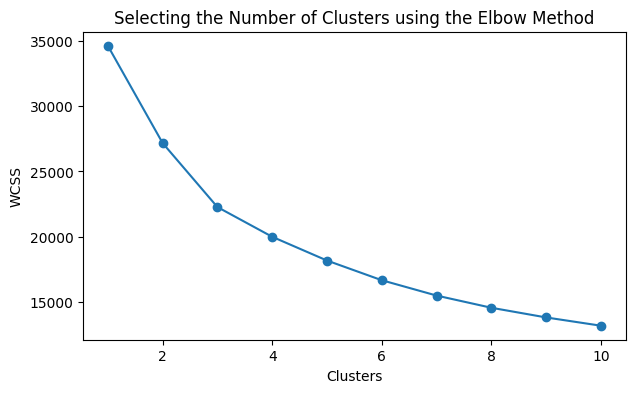

In [11]:
#Find the Best K with Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss, marker='o')

plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
#Clustering with K-Means Clustering (K=3)
kmean = KMeans(n_clusters=3)
kmean.fit(df_scaled)
labels = kmean.labels_
df_scaled['group'] = labels 
df_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,group
0,-1.816072,-1.709074,-0.538182,1.400757,-0.192215,-1.046782,-0.556228,0
1,-0.049224,-0.117679,-0.863506,0.529926,-0.249439,-1.046782,-0.556228,0
2,-0.579278,-0.471322,-1.362335,-1.211736,-0.535558,-1.046782,-0.556228,0
3,-0.932648,-1.001787,0.567918,-1.211736,0.437247,0.144176,-0.556228,0
4,-0.932648,-1.090198,-0.624935,1.400757,-0.535558,0.144176,-0.556228,0
...,...,...,...,...,...,...,...,...
4943,-1.462703,-1.532252,-0.733376,-1.211736,-0.020543,1.335134,-0.556228,0
4944,-1.374360,-1.443841,-1.275582,1.400757,-0.878901,-1.046782,0.278590,0
4945,1.540939,1.650538,-1.080388,-0.340905,-0.936125,1.335134,-0.556228,1
4946,1.717624,1.738949,-0.538182,0.529926,-0.821677,0.144176,-0.556228,1


In [13]:
#Profile Plot
profile_plot = df_scaled.groupby(["group"]).mean()
profile_plot.rename(index = {0:'group 1',1:'group 2',2:'group 3'}, inplace = True)
profile_plot

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
group,,,,,,,
group 1,-0.883638,-0.884496,-0.303062,0.172706,-0.325446,0.081620,-0.119307
group 2,0.896730,0.889902,-0.345138,0.004439,-0.333293,0.099331,-0.126086
group 3,-0.135075,-0.116224,1.562774,-0.416630,1.586151,-0.436608,0.591097


In [14]:
#Save result of Profile Plot to excel file
profile_plot.to_excel('profile_plot.xlsx')

In [15]:
#Save result of Clustering to excel file
cluster = df_clus.copy()
cluster['group'] = labels 
cluster.to_excel('cluster.xlsx')

### Association Rules Analytics ###

In [16]:
#Library for Association rules
from keras.utils import to_categorical
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
#One-Hot Encoding labels clustering
encoded = to_categorical(df_scaled['group'])
cluster_encoded = pd.DataFrame(encoded)
#rename specific column names
cluster_encoded.rename(columns = {0:'group 1',1:'group 2',2:'group 3'}, inplace = True)

In [18]:
#Data Selection for Association rules
df_asso = data.iloc[:,8:]
df_asso = pd.concat([df_asso, cluster_encoded], axis=1)
df_asso

,Personal Loan,Securities Account,CD Account,Online,CreditCard,group 1,group 2,group 3
0,0,1,0,0,0,1.0,0.0,0.0
1,0,1,0,0,0,1.0,0.0,0.0
2,0,0,0,0,0,1.0,0.0,0.0
3,0,0,0,0,0,1.0,0.0,0.0
4,0,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4943,0,0,0,1,0,1.0,0.0,0.0
4944,0,0,0,1,0,1.0,0.0,0.0
4945,0,0,0,0,0,0.0,1.0,0.0
4946,0,0,0,1,0,0.0,1.0,0.0


In [19]:
#Data Transformation (convert to Boolean)
df_asso = df_asso.replace({0:False, 1:True})
df_asso

,Personal Loan,Securities Account,CD Account,Online,CreditCard,group 1,group 2,group 3
0,False,True,False,False,False,True,False,False
1,False,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
4943,False,False,False,True,False,True,False,False
4944,False,False,False,True,False,True,False,False
4945,False,False,False,False,False,False,True,False
4946,False,False,False,True,False,False,True,False


In [20]:
#Find frequency patterns with Apriori Algorithm
#set a threshold value for the support value and calculate the support value.
dt_asso = apriori(df_asso, min_support = 0.01, use_colnames = True, verbose = 1)
dt_asso

Processing 45 combinations | Sampling itemset size 5


,support,itemsets
0,0.097009,(Personal Loan)
1,0.104285,(Securities Account)
2,0.061035,(CD Account)
3,0.597009,(Online)
4,0.294058,(CreditCard)
...,...,...
64,0.017381,"(CD Account, CreditCard, Securities Account, O..."
65,0.013945,"(CD Account, CreditCard, group 1, Online)"
66,0.013339,"(group 2, CD Account, CreditCard, Online)"
67,0.017987,"(CD Account, CreditCard, group 3, Online)"


In [32]:
#Let's view our interpretation values using the Associan rule function.
rules = association_rules(dt_asso, metric = "confidence", min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CD Account),(Online),0.061035,0.597009,0.057195,0.937086,1.569635,0.020757,6.405438
1,(CD Account),(CreditCard),0.061035,0.294058,0.048504,0.794702,2.702533,0.030557,3.438620
2,"(Personal Loan, Securities Account)",(CD Account),0.012126,0.061035,0.010307,0.850000,13.926490,0.009567,6.259768
3,"(Personal Loan, CD Account)",(Online),0.028294,0.597009,0.025465,0.900000,1.507515,0.008573,4.029911
4,"(Personal Loan, CD Account)",(group 3),0.028294,0.171989,0.021625,0.764286,4.443814,0.016759,3.512775
5,"(CD Account, group 3)",(Personal Loan),0.027082,0.097009,0.021625,0.798507,8.231281,0.018998,4.481511
6,"(CD Account, Securities Account)",(Online),0.029709,0.597009,0.026677,0.897959,1.504097,0.008941,3.949313
7,"(CreditCard, Securities Account)",(CD Account),0.028294,0.061035,0.019806,0.700000,11.468874,0.018079,3.129884
8,"(group 3, Securities Account)",(Online),0.018998,0.597009,0.013339,0.702128,1.176076,0.001997,1.352899
9,"(CD Account, CreditCard)",(Online),0.048504,0.597009,0.045271,0.933333,1.563349,0.016313,6.044867


In [33]:
#Save result of Association rules to excel file
rules.to_excel('rules.xlsx')

In [34]:
#Load the data
Personal_loan_rule = pd.read_excel (r'./rules.xlsx', sheet_name = 'Sheet2')
Personal_loan_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"('CD Account', 'group 3')",('Personal Loan'),0.027082,0.097009,0.021625,0.798507,8.231281,0.018998,4.481511
1,"('CD Account', 'group 3', 'Online')",('Personal Loan'),0.025061,0.097009,0.019604,0.782258,8.063777,0.017173,4.147070
2,"('CD Account', 'CreditCard', 'group 3')",('Personal Loan'),0.019604,0.097009,0.014551,0.742268,7.651546,0.012650,3.503605
3,"('CD Account', 'CreditCard', 'group 3', 'Online')",('Personal Loan'),0.017987,0.097009,0.012935,0.719101,7.412734,0.011190,3.214648
